<a href="https://colab.research.google.com/github/wandieinnocents/sales_analysis_python_thesis/blob/main/Sales_Analysis_thesis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS  PERFORMANCE ANALYSIS

In this research, I utilize Python Pandas and Python Matplotlib to evaluate and respond to business queries regarding sales data from the previous 12 months. The information includes hundreds of thousands of electronics store purchases that are split down by month, product type, price, location of purchase, and other factors. This research can provide a 12-month performance history for the company.

In [1]:
# import libraries
import pandas as pd
import os


In [2]:

# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# read the dataset 12 months
df = pd.read_csv("/content/drive/MyDrive/research/dataset/Sales_April_2019.csv")

In [4]:
# display the dataset
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


# Merging the data for 12 months
Here i merge the dataset for 12 months

In [5]:
# display all the months data file names
files = [file for file in os.listdir("/content/drive/MyDrive/research/dataset")]
for file in files:
  print(file)

Sales_July_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_February_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_May_2019.csv
Sales_April_2019.csv
Sales_November_2019.csv
Sales_March_2019.csv


In [6]:
# Reading all the datasets in the dataset folder to combine them as one

#Creating empty dataframe called 'all_month_data'
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("/content/drive/MyDrive/research/dataset/"+file)
    #Merging to the previous empty dataframe
    all_months_data = pd.concat([all_months_data, df])

In [7]:
#Checking the result
#convert dataframe to a single csv file containing 12 months data.
all_months_data.to_csv("/content/drive/MyDrive/research/all_data.csv", index=False)


In [8]:
# Reading an updated dataframe with all months
all_data=pd.read_csv("/content/drive/MyDrive/research/all_data.csv")

# print all the combined dataframe
all_data.head(200)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
195,223101,Wired Headphones,1,11.99,07/10/19 16:55,"924 Lincoln St, San Francisco, CA 94016"
196,223102,Wired Headphones,2,11.99,07/16/19 20:54,"484 7th St, Seattle, WA 98101"
197,223103,Apple Airpods Headphones,1,150,07/13/19 11:25,"107 West St, San Francisco, CA 94016"
198,223104,20in Monitor,1,109.99,07/08/19 07:29,"505 4th St, Los Angeles, CA 90001"


#DATASET NOW COMBINED FOR THE 12 MONTHS

 What was the best month for sales? How much was earned that month?

- To answer this problem, i add an additional column called “Month”.
- The month is extracted from order date .
- cleaning the dataset to remove null values (NaN) ,

In [9]:

#Removing Nan (null values ) Values in our data
all_data=all_data.dropna(how='all')

#Removing rows based on condition, finding 'Or' and delete it
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

# print the data without null values
all_data.head(200)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
195,223101,Wired Headphones,1,11.99,07/10/19 16:55,"924 Lincoln St, San Francisco, CA 94016"
196,223102,Wired Headphones,2,11.99,07/16/19 20:54,"484 7th St, Seattle, WA 98101"
197,223103,Apple Airpods Headphones,1,150,07/13/19 11:25,"107 West St, San Francisco, CA 94016"
198,223104,20in Monitor,1,109.99,07/08/19 07:29,"505 4th St, Los Angeles, CA 90001"


In [10]:
#Now we can add "Month" Column
all_data['Month'] = all_data['Order Date'].str[0:2] #Get the first 2 characters.
all_data['Month'] = all_data['Month'].astype('int32') #turning the data from string to integer

# print dataset with month added
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7
...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",3
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",3
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",3
186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",3


In [11]:
#Converting values to numerice for easy interpretation
#quantity to numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

#price to numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#Add the Sales colum,
We add the sales column to allow us to calculate the number of sales , and which month with most sales.
- Sales Formulae = Quantity ordered * (multiplied by ) Price

In [12]:
#Add "Sales" Column
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
# print dataset with sales added
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


#What was the best month for sales? How much was earned that month?

i use the  groupby(‘Month’).sum() method.

In [13]:
all_data.groupby('Month').sum()

<ipython-input-13-d881b5762253>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


We can clearly see that month 12 (December) is the highest sales
- i use matplotlib to vizualize the results in bar chart.

<ipython-input-14-d2ebf484c4ec>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


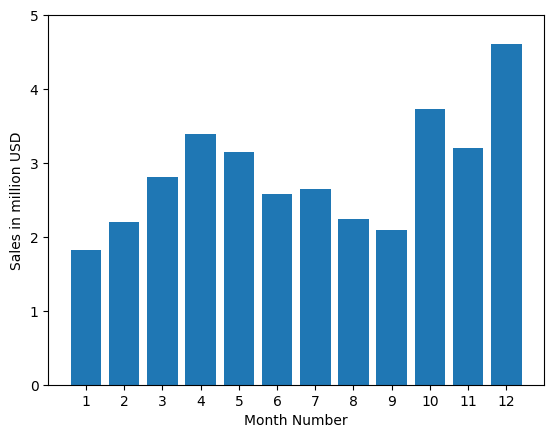

In [14]:
import matplotlib.pyplot as plt


# #### Visualizing our results
months = range(1,13) #For x axes
results = all_data.groupby('Month').sum()
# plotting
plt.bar(months, results['Sales'])
plt.xticks(months)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #Scaling in million USD
plt.ylabel('Sales in million USD')
plt.xlabel('Month Number')
plt.show()

Now, not only we can get the highest sales, but we can also get the lowest sales just by looking it for a few seconds.

## What city sold the most product?

To answer this question, obviously we need to create a new column called “City” column.


In [15]:

#Task 3: Add a "City" Column

#Function
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#Extract the city and the state
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA


In [16]:
results2 = all_data.groupby('City').sum()
results2

<ipython-input-16-f6620a14fb16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results2 = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


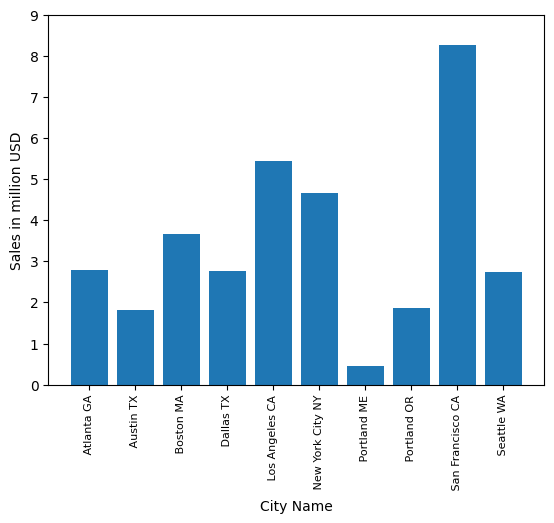

In [17]:
#Fixing the cities order
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #Scaling in million USD
plt.ylabel('Sales in million USD')
plt.xlabel('City Name')
plt.show()


What Time Should We Display Advertisements to Maximize Likelihood of Customer’s Buying Product?

In [18]:

#Create new column in date-time Object (DTO)
all_data['Order_Date_DTO'] = pd.to_datetime(all_data['Order Date'])

#Extraction the hours data
all_data['Hour'] = all_data['Order_Date_DTO'].dt.hour

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO,Hour
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA,2019-07-26 16:51:00,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA,2019-07-05 08:55:00,8
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA,2019-07-29 12:41:00,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA,2019-07-28 10:15:00,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA,2019-07-31 02:13:00,2


Now we can answer the third question, what time should we display advertisements to maximize likelihood of customer’s buying product? To answer this, we’re gonna group it by the hours and counting all of the orders.

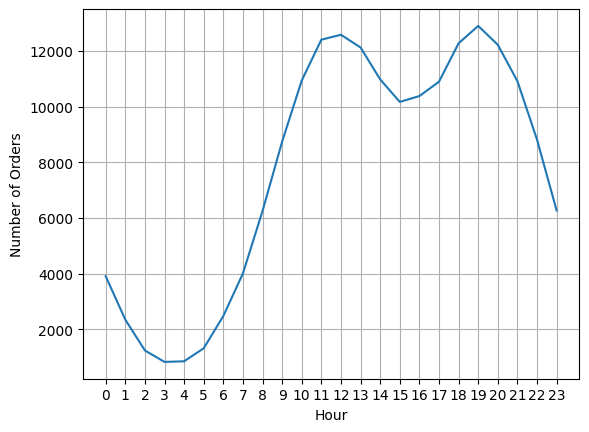

In [19]:

#Plotting
results3 = all_data.groupby(['Hour'])['Quantity Ordered'].count()
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, results3)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#What products are most often sold together?

In [20]:
# ### Question 4: What products are most often sold together?

#Make a new dataframe to seperate the duplicated values of Order ID
new_all = all_data[all_data['Order ID'].duplicated(keep=False)]

#Joining few products with the same Order ID into the same line.
new_all['Product_Bundle'] = new_all.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#Dropping the duplicate values
new_all = new_all[['Order ID','Product_Bundle']].drop_duplicates()

new_all.head()

<ipython-input-20-a0353d33288b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_all['Product_Bundle'] = new_all.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product_Bundle
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"


#Counting the Product bundles

In [21]:
# #### Task 6: Counting the Product bundles

#Importing libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_all['Product_Bundle']:
    row_list = row.split(',')
    #count.update(Counter(combinations(row_list,2))) #Counting all the 2 products bundle
    count.update(Counter(combinations(row_list,3))) #Counting all the 3 products bundle

count.most_common(10)


[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5)]

#What Product sold the most?


<ipython-input-22-e840477ae8d7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


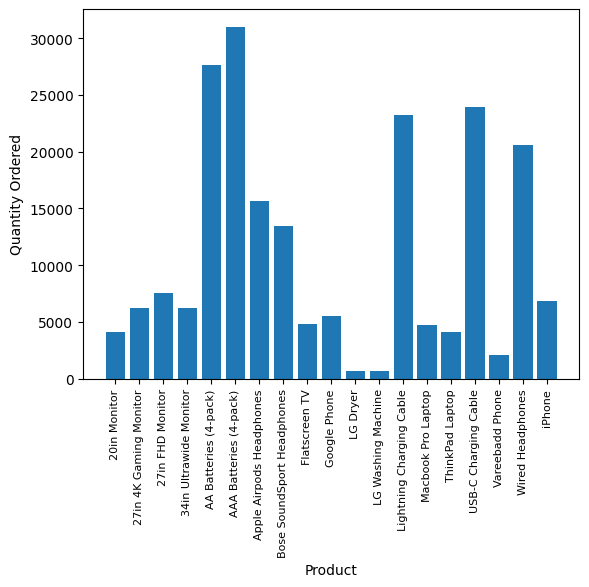

In [22]:
product_group = all_data.groupby('Product')

#Visualizing
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

<ipython-input-23-b1b4240eb5fc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-23-b1b4240eb5fc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


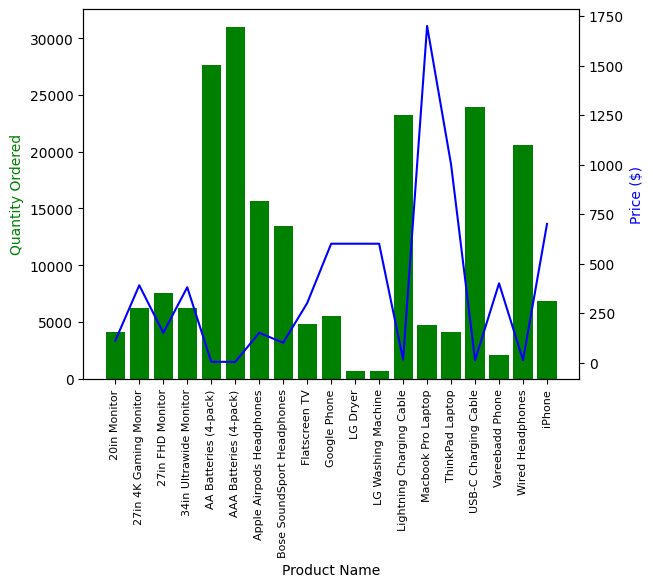

In [23]:
# #### Task 8: Overlaying a second y-axis on existing chart
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

Continuation with Exploratory Data Analysis (EDA)